<a href="https://colab.research.google.com/github/gauravguptagtm/deep-learning-notebook/blob/main/DL_7(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

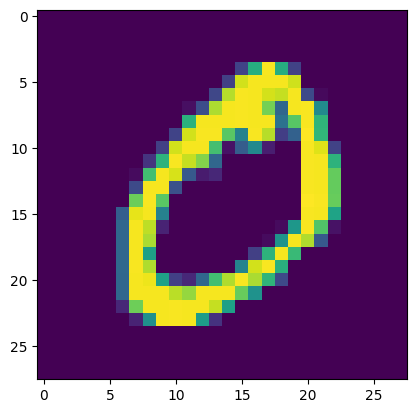

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [21]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In sparse_categorical_crossentropy, we don't need to do onehot_encoding.

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [24]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2887 - accuracy: 0.9174 - val_loss: 0.1672 - val_accuracy: 0.9518
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1263 - accuracy: 0.9631 - val_loss: 0.1172 - val_accuracy: 0.9656
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0869 - accuracy: 0.9750 - val_loss: 0.0965 - val_accuracy: 0.9727
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0644 - accuracy: 0.9814 - val_loss: 0.0963 - val_accuracy: 0.9720
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0884 - val_accuracy: 0.9742
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.0821 - val_accuracy: 0.9765
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0902 - val_accuracy:

In [31]:
import matplotlib.pyplot as plt

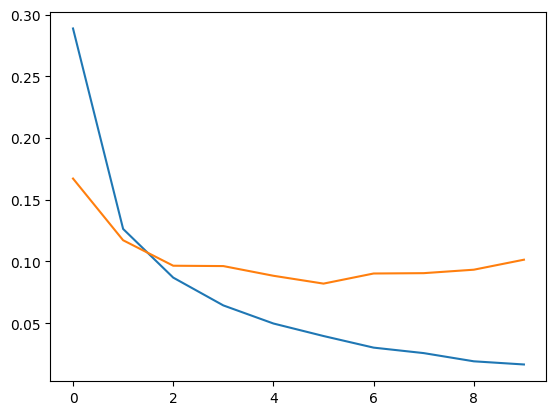

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

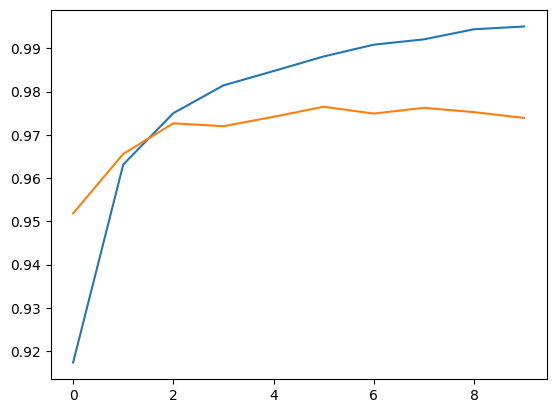

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [25]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [26]:
y_prob

array([[1.78543458e-09, 3.20782290e-11, 1.54229767e-08, ...,
        9.99996483e-01, 2.14988069e-10, 1.73788294e-06],
       [9.66868946e-13, 2.92169375e-07, 9.99999583e-01, ...,
        4.35333227e-14, 1.70969461e-09, 2.44566390e-16],
       [7.65951498e-08, 9.98958349e-01, 3.23564491e-05, ...,
        7.75191817e-04, 2.24970412e-04, 5.98390244e-08],
       ...,
       [1.01619643e-17, 1.13818324e-14, 1.67838718e-16, ...,
        5.89453863e-09, 5.21180099e-10, 1.12018779e-05],
       [1.26940897e-16, 6.07754877e-19, 7.79605402e-18, ...,
        4.30979840e-16, 1.41902969e-08, 1.04927096e-15],
       [4.66821082e-10, 4.61591399e-16, 4.64349175e-12, ...,
        1.90312959e-18, 3.71554424e-14, 8.47905325e-17]], dtype=float32)

In [27]:
y_pred = y_prob.argmax(axis=1)

In [28]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, y_pred)

0.9761

In [35]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 36ms/step


array([7])